# A Time-Series Analysis on the Philippines' Inflation Rate from 1960 to 2021
## (With the terms' corresponding president)

Von Stephen Carandang
Andre Mhiko Carandang
Gianello Montenegro
Mikaela Raymundo

BSECE - T4A

Date Submitted

Submitted To: Engr. Aisa Mijeno-Labastilla, PCpE

**Major Assessment 3 / Capstone Assessment**

**Training and Evaluation of the Gathered Data**

**First Semester SY 2023-2024**

**I.	Introduction / Problem Statement**
• Describe the problem you are trying to give a solution in doing the training and evaluation of the gathered data. State what SDG you are targeting 

**II.	Review of Related Literature**
• Describe here the technical know-how that you learned and researched related to your problem, 

**III.	Gathered Data / Dataset**
• Describe here your dataset (type, size, repositories, links, etc.)
• Link to the shared dataset
"TEMPORARY DATASET: https://fred.stlouisfed.org/series/FPCPITOTLZGPHL"

**IV. Objectives**
• State here the main objective and the specific objectives to achieve the main objective

**V. Conceptual**
• Describe here how you will manipulate your data to achieve the main objective of training and evaluating the gathered data

**VI. Data and Results**
• Discuss here the results of each conducted training and evaluation

**VII. Conclusion**
• Must be parallel with the objectives

**VIII. Share your thoughts individually and overall feedback after completing this course.** 

**IX. Program Codes (Jupyter notebook)**


# 1. Import Dataset

In [57]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import sklearn
# Negate the warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [58]:
# Import the dataset for inflation
df_inflation = pd.read_csv('Philippine_Inflation.csv')
df_inflation.info

<bound method DataFrame.info of           DATE  FPCPITOTLZGPHL
0   1960-01-01        4.154822
1   1961-01-01        1.595633
2   1962-01-01        5.796652
3   1963-01-01        5.625549
4   1964-01-01        8.183079
5   1965-01-01        2.564103
6   1966-01-01        5.400000
7   1967-01-01        6.253953
8   1968-01-01        2.358806
9   1969-01-01        1.955510
10  1970-01-01       14.381462
11  1971-01-01       21.403344
12  1972-01-01        8.204034
13  1973-01-01       16.580032
14  1974-01-01       34.163592
15  1975-01-01        6.761403
16  1976-01-01        9.199227
17  1977-01-01        9.898752
18  1978-01-01        7.334526
19  1979-01-01       17.533333
20  1980-01-01       18.200510
21  1981-01-01       13.082599
22  1982-01-01       10.221727
23  1983-01-01       10.029357
24  1984-01-01       50.338976
25  1985-01-01       23.103107
26  1986-01-01        1.148138
27  1987-01-01        4.069767
28  1988-01-01       13.860069
29  1989-01-01       12.242991
30  199

In [59]:
# Import the dataset for debt
df_debt = pd.read_csv('Debt data\Philippines, External debt stocks, total (DOD, current US$).csv')
df_debt.info

<bound method DataFrame.info of     Date         Value
0   1960           NaN
1   1961           NaN
2   1962           NaN
3   1963           NaN
4   1964           NaN
5   1965           NaN
6   1966           NaN
7   1967           NaN
8   1968           NaN
9   1969           NaN
10  1970  2.196028e+09
11  1971  2.419453e+09
12  1972  2.671171e+09
13  1973  2.761258e+09
14  1974  3.305258e+09
15  1975  4.170680e+09
16  1976  6.039461e+09
17  1977  8.183428e+09
18  1978  1.077216e+10
19  1979  1.328160e+10
20  1980  1.741720e+10
21  1981  2.078592e+10
22  1982  2.441264e+10
23  1983  2.421110e+10
24  1984  2.435670e+10
25  1985  2.663731e+10
26  1986  2.820416e+10
27  1987  2.978476e+10
28  1988  2.893215e+10
29  1989  2.865285e+10
30  1990  3.057985e+10
31  1991  3.249334e+10
32  1992  3.321904e+10
33  1993  3.614238e+10
34  1994  4.025327e+10
35  1995  3.937493e+10
36  1996  4.399712e+10
37  1997  5.070224e+10
38  1998  5.359338e+10
39  1999  5.847013e+10
40  2000  5.844530e+10
41

# 2. Clean Dataset for Null Values

In [60]:
df_inflation.isnull().sum()

DATE              0
FPCPITOTLZGPHL    0
dtype: int64

In [61]:
df_debt.isnull().sum()

Date      0
Value    12
dtype: int64

In [62]:
df_debt = df_debt.fillna(0)
df_debt.head()

,Date,Value
0,1960,0.0
1,1961,0.0
2,1962,0.0
3,1963,0.0
4,1964,0.0


# 3. Combine both datasets
> (Compute necessary missing values for Debt)

In [63]:
# Rename columns
df_debt.rename(columns={'Value' : 'Debt'}, inplace=True)
df_inflation.rename(columns={'DATE': 'Year', 'FPCPITOTLZGPHL': 'Inflation Rate'}, inplace=True)

In [64]:
# Convert the year to datetime
df_inflation['Year'] = pd.to_datetime(df_inflation['Year']).dt.year
df_inflation.head()

,Year,Inflation Rate
0,1960,4.154822
1,1961,1.595633
2,1962,5.796652
3,1963,5.625549
4,1964,8.183079


In [65]:
debt_total = df_debt['Debt'].tolist()

df_inflation['Total Debt'] = debt_total[:len(df_inflation)]
df_inflation.info()
df_inflation.head(70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            63 non-null     int32  
 1   Inflation Rate  63 non-null     float64
 2   Total Debt      63 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.4 KB


,Year,Inflation Rate,Total Debt
0,1960,4.154822,0.000000e+00
1,1961,1.595633,0.000000e+00
2,1962,5.796652,0.000000e+00
3,1963,5.625549,0.000000e+00
4,1964,8.183079,0.000000e+00
5,1965,2.564103,0.000000e+00
6,1966,5.400000,0.000000e+00
7,1967,6.253953,0.000000e+00
8,1968,2.358806,0.000000e+00
9,1969,1.955510,0.000000e+00


In [66]:
def format_currency(x):
    if x >= 1e9 or x <= -1e9:
        return x*1e-9
    elif x >= 1e6 or x <= -1e6:
        return x*1e-6
    elif x >= 1e3 or x <= -1e3:
        return x*1e-3
    else:
        return x


df_inflation['Total Debt'] = df_inflation['Total Debt'].apply(format_currency)
df_inflation.head(70)

,Year,Inflation Rate,Total Debt
0,1960,4.154822,0.000000
1,1961,1.595633,0.000000
2,1962,5.796652,0.000000
3,1963,5.625549,0.000000
4,1964,8.183079,0.000000
5,1965,2.564103,0.000000
6,1966,5.400000,0.000000
7,1967,6.253953,0.000000
8,1968,2.358806,0.000000
9,1969,1.955510,0.000000


In [67]:
# Reset the index of df_inflation
df_inflation.reset_index(drop=True, inplace=True)

# Calculate added debt per year
added_debt_per_year = []
for i in range(1, len(df_inflation['Total Debt'])):
    added_debt_per_year.append(df_inflation['Total Debt'][i] - df_inflation['Total Debt'][i-1])

added_debt_per_year.pop()
added_debt_per_year.insert(0, 0.0)
print(len(added_debt_per_year))

df_inflation = df_inflation[:-1]
# # Add the 'Added Debt' column to df_inflation
df_inflation['Added Debt'] = added_debt_per_year

62


In [68]:
pd.set_option('display.max_rows', None)
df_inflation.head(70)

,Year,Inflation Rate,Total Debt,Added Debt
0,1960,4.154822,0.000000,0.000000
1,1961,1.595633,0.000000,0.000000
2,1962,5.796652,0.000000,0.000000
3,1963,5.625549,0.000000,0.000000
4,1964,8.183079,0.000000,0.000000
5,1965,2.564103,0.000000,0.000000
6,1966,5.400000,0.000000,0.000000
7,1967,6.253953,0.000000,0.000000
8,1968,2.358806,0.000000,0.000000
9,1969,1.955510,0.000000,0.000000


In [69]:
# dictionary of presidents and their years in office
pres_dict = {
    'C. Garcia': [1960],
    'D. Macapagal': list(range(1961, 1965)),
    'F. Marcos': list(range(1965, 1986)),
    'C. Aquino': list(range(1986, 1992)),
    'F. Ramos': list(range(1992, 1998)),
    'J. Estrada': list(range(1998, 2001)),
    'G. Arroyo': list(range(2001, 2010)),
    'B. Aquino': list(range(2010, 2016)),
    'R. Duterte': list(range(2016, 2022)),
}

def get_president(year):
    for president, years in pres_dict.items():
        if year in years:
            return president
    return None

# df_inflation['Added Debt'] = df_inflation['Added Debt'].shift(1)
# df_inflation = df_inflation.drop(df_inflation.index[-1])

df_inflation['President'] = df_inflation['Year'].apply(get_president)

# df_inflation.loc[df_inflation.index[-1], 'Added Debt'] = 106.428000 - 98.493688

df_inflation.head(65)

,Year,Inflation Rate,Total Debt,Added Debt,President
0,1960,4.154822,0.000000,0.000000,C. Garcia
1,1961,1.595633,0.000000,0.000000,D. Macapagal
2,1962,5.796652,0.000000,0.000000,D. Macapagal
3,1963,5.625549,0.000000,0.000000,D. Macapagal
4,1964,8.183079,0.000000,0.000000,D. Macapagal
5,1965,2.564103,0.000000,0.000000,F. Marcos
6,1966,5.400000,0.000000,0.000000,F. Marcos
7,1967,6.253953,0.000000,0.000000,F. Marcos
8,1968,2.358806,0.000000,0.000000,F. Marcos
9,1969,1.955510,0.000000,0.000000,F. Marcos


# 4. Values Visualization

<BarContainer object of 62 artists>

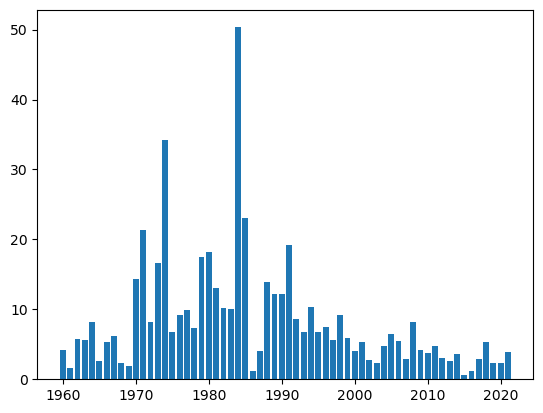

In [70]:
plt.bar(df_inflation['Year'], df_inflation['Inflation Rate'])

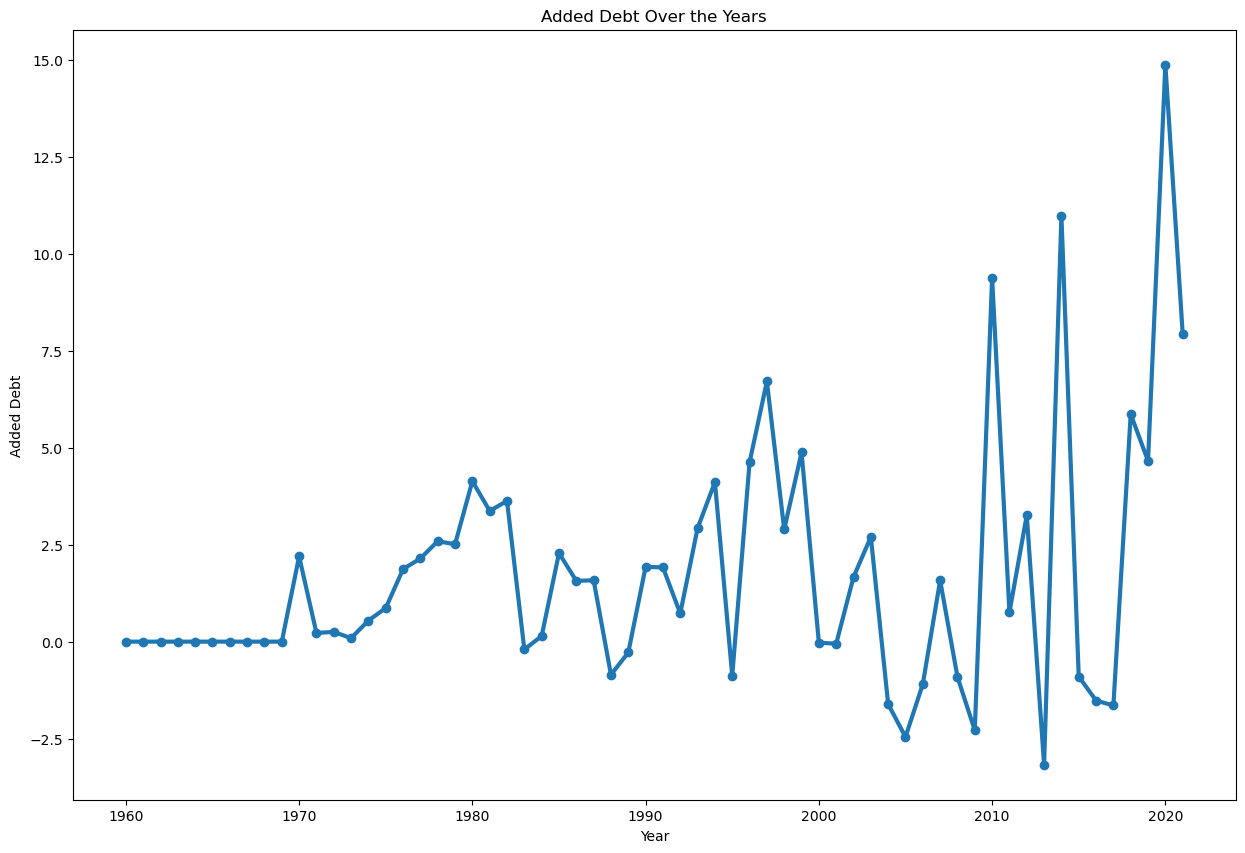

In [71]:
# Line plot
plt.figure(figsize=(15, 10))
plt.plot(df_inflation['Year'], df_inflation['Added Debt'], linewidth=3)
plt.scatter(df_inflation['Year'], df_inflation['Added Debt'])
plt.xlabel('Year')
plt.ylabel('Added Debt')
plt.title('Added Debt Over the Years')

plt.show()


<Axes: xlabel='Inflation Rate', ylabel='Count'>

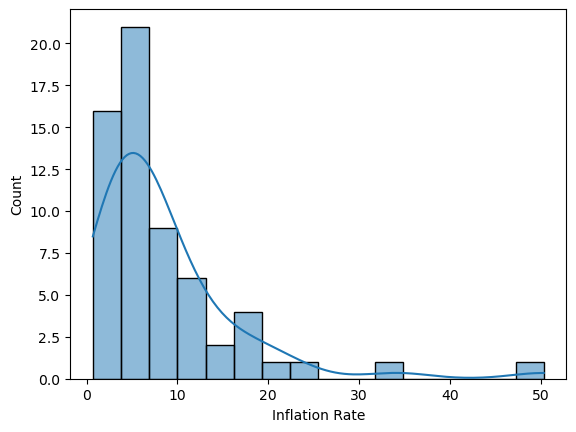

In [72]:
sns.histplot(df_inflation['Inflation Rate'], kde=True)

<Axes: xlabel='Total Debt', ylabel='Count'>

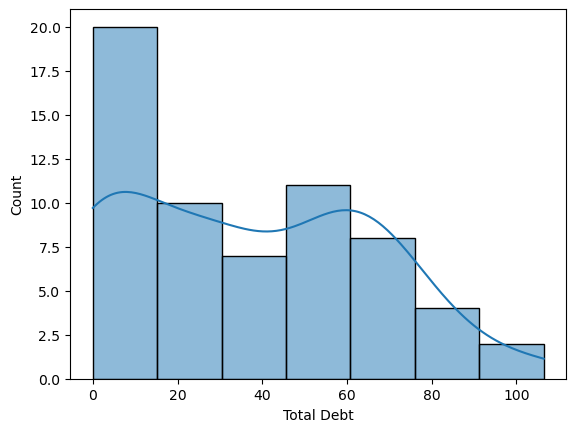

In [73]:
sns.histplot(df_inflation['Total Debt'], kde=True)

<Axes: xlabel='Added Debt', ylabel='Count'>

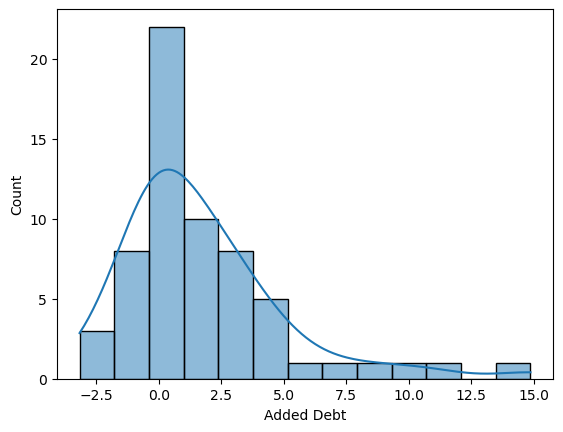

In [74]:
sns.histplot(df_inflation['Added Debt'], kde=True)

# 5. Data interpretation per president term

## 5.A Inflation Rate Per Presidential Term
> (n.b., some values from the dataset are not enough for completely capturing the inflation rate for some presidential terms)

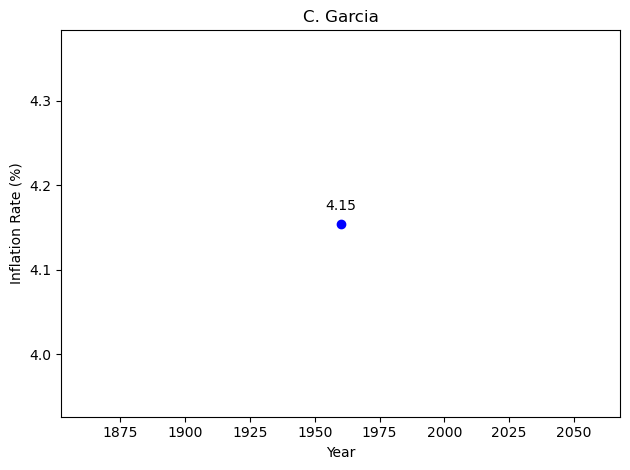

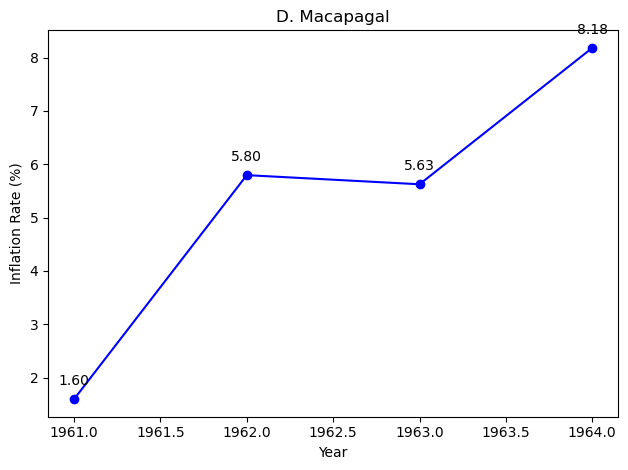

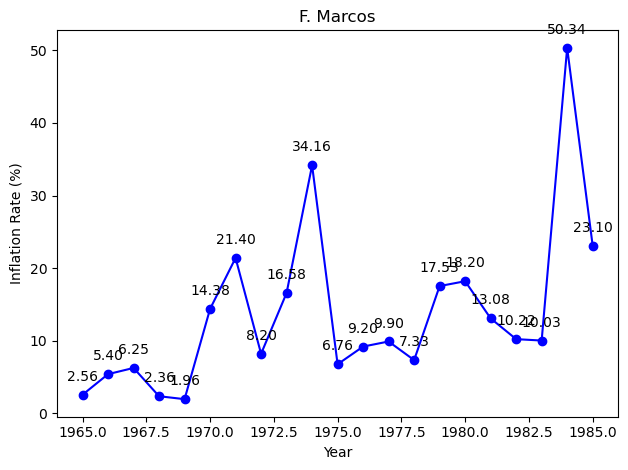

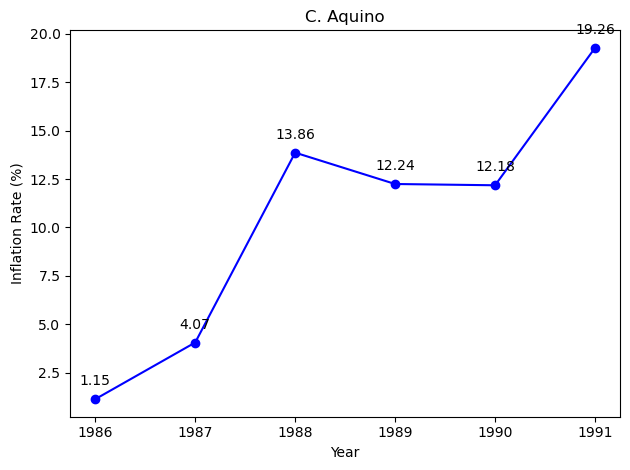

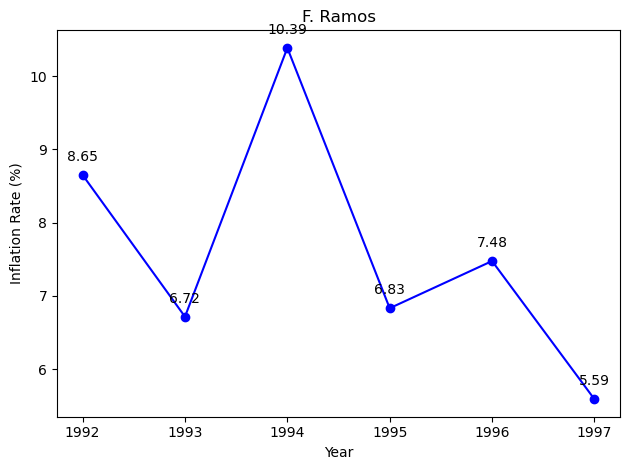

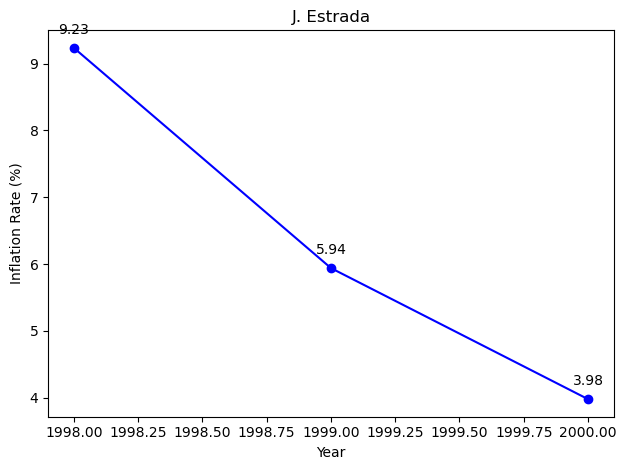

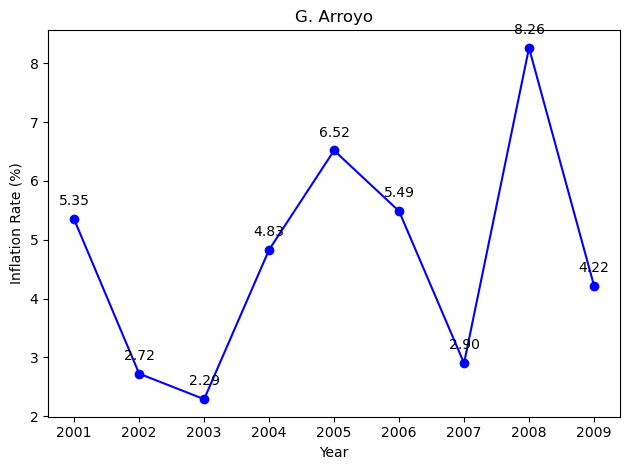

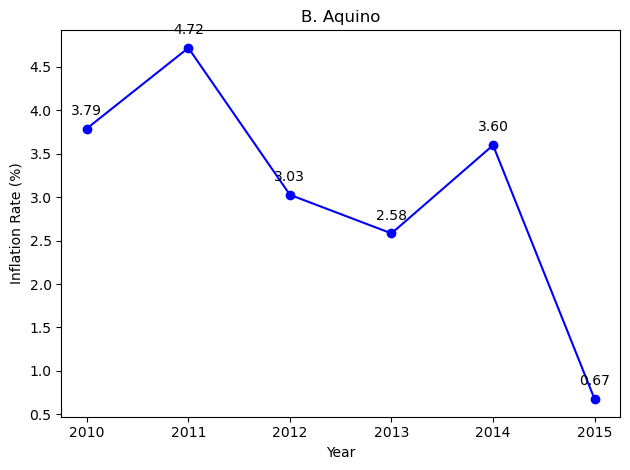

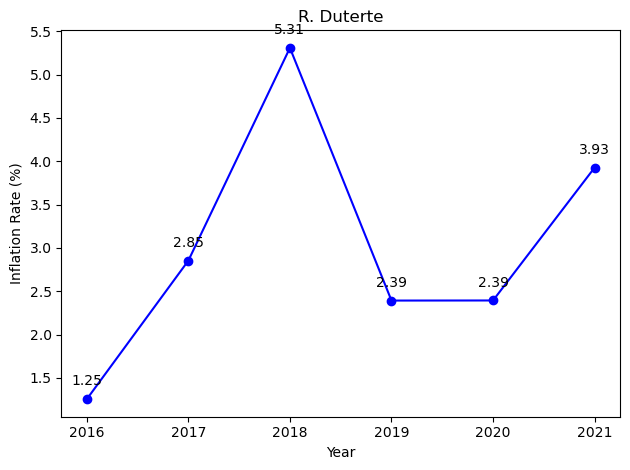

In [114]:
for pres in pres_dict:
    plt.title(pres)
    plt.scatter(df_inflation[df_inflation['President'] == pres]['Year'], df_inflation[df_inflation['President'] == pres]['Inflation Rate'], color='blue')
    plt.xlabel('Year')
    plt.ylabel('Inflation Rate (%)')
    plt.plot(df_inflation[df_inflation['President'] == pres]['Year'], df_inflation[df_inflation['President'] == pres]['Inflation Rate'], color='blue')
    plt.tight_layout()
    
    # Add value annotation to each datapoint
    for x, y in zip(df_inflation[df_inflation['President'] == pres]['Year'], df_inflation[df_inflation['President'] == pres]['Inflation Rate']):
        plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.show()

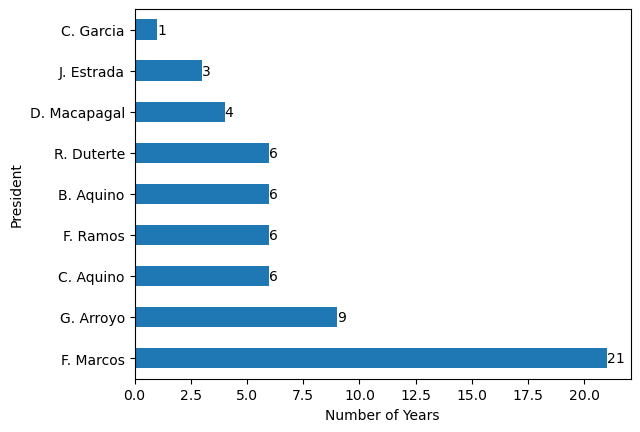

In [76]:
df_inflation['President'].value_counts().plot(kind='barh')
plt.xlabel('Number of Years')
plt.ylabel('President')


# Add values to each bar
for i, value in enumerate(df_inflation['President'].value_counts()):
    plt.text(value, i, str(round(value, 2)), ha='left', va='center')


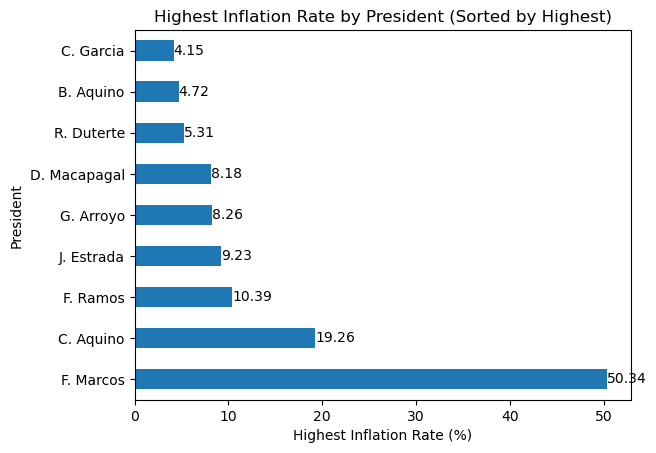

In [77]:
highest_inflation = df_inflation.groupby('President')['Inflation Rate'].max().sort_values(ascending=False)
highest_inflation.plot(kind='barh')
highest_inflation.head()

plt.title('Highest Inflation Rate by President (Sorted by Highest)')
plt.xlabel('Highest Inflation Rate (%)')
plt.ylabel('President')

# Add values to each bar
for i, value in enumerate(highest_inflation):
    plt.text(value, i, str(round(value, 2)), ha='left', va='center')

plt.show()


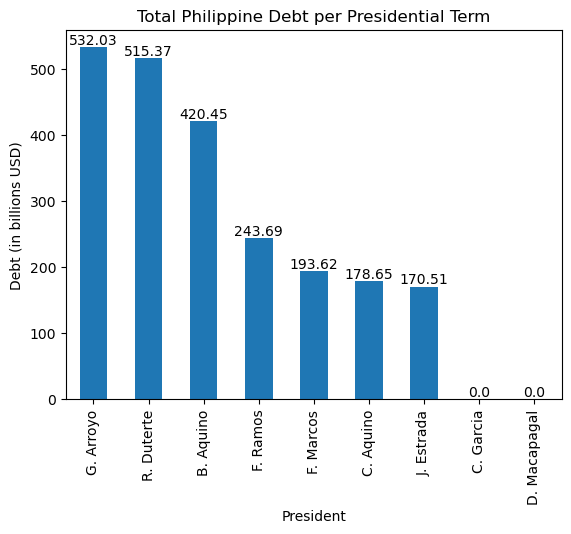

In [78]:
debt_per_president = df_inflation.groupby('President')['Total Debt'].sum().sort_values(ascending=False)
debt_per_president.plot(kind='bar')

plt.title('Total Philippine Debt per Presidential Term')
plt.xlabel('President')
plt.ylabel('Debt (in billions USD)')

# Add values to each bar
for i, value in enumerate(debt_per_president):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()



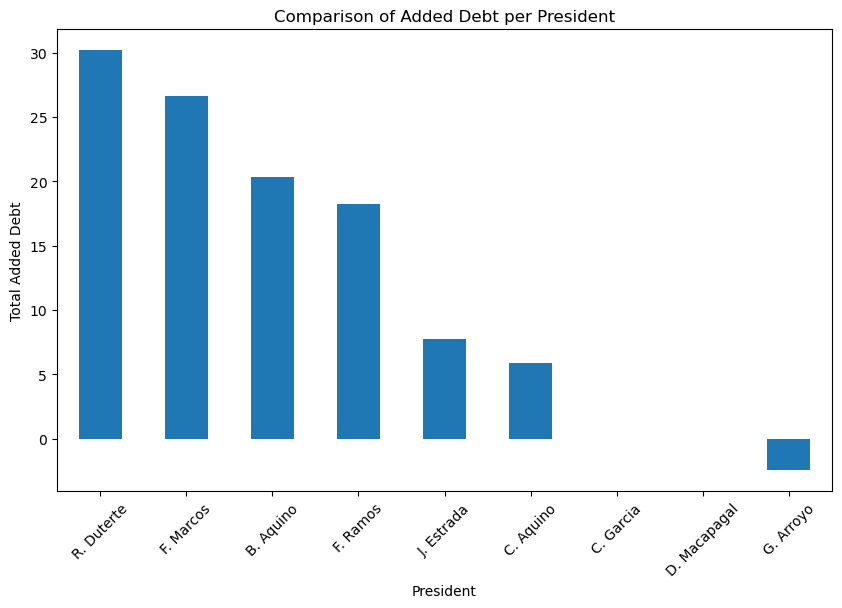

In [79]:
# Group by 'President' and calculate the sum of 'Added Debt'
debt_by_president = df_inflation.groupby('President')['Added Debt'].sum().sort_values(ascending=False)

# Plot the results for all presidents
debt_by_president.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Added Debt')
plt.title('Comparison of Added Debt per President')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

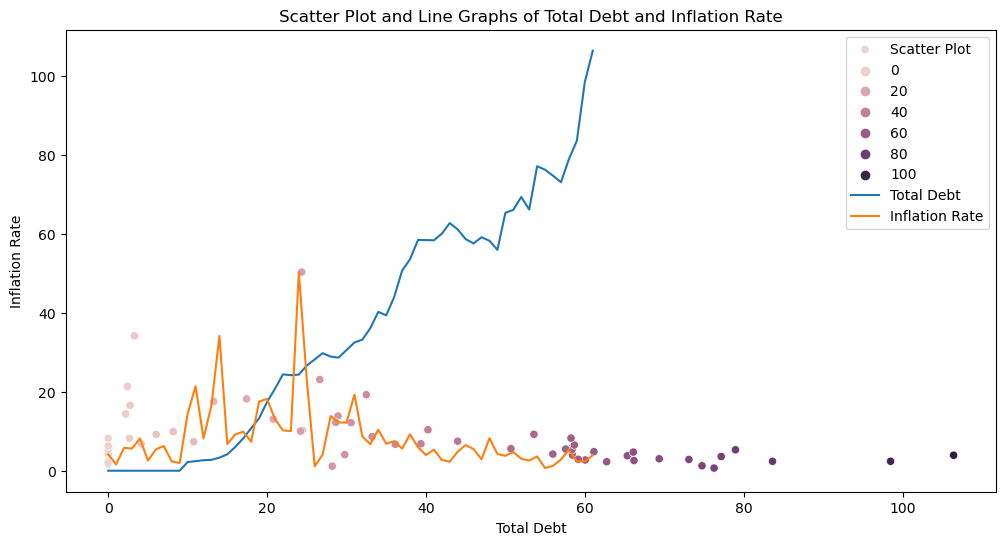

In [80]:
column1 = 'Total Debt'
column2 = 'Inflation Rate'

# Create a scatter plot with different colors for each column
plt.figure(figsize=(12, 6))

sns.scatterplot(x=column1, y=column2, data=df_inflation, hue=df_inflation[column1], label='Scatter Plot')

# Line graph for column1
sns.lineplot(x=df_inflation.index, y=df_inflation[column1], label=column1)

# Line graph for column2
sns.lineplot(x=df_inflation.index, y=df_inflation[column2], label=column2)

# Set plot labels and title
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter Plot and Line Graphs of {column1} and {column2}')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [116]:
df_inflation.shape

(62, 5)

# 6. Prediction of Inflation Rate

We'll be using Random Forest for our Machine Learning Model. Compared to Decision Trees, Random Forest has a more robust structure to identify underlying patterns.

## Import Machine Learning Libraries

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [142]:
feature_cols = ['Total Debt', 'Added Debt']
X = df_inflation[feature_cols]
y = df_inflation['Inflation Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the model and train it
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Make predictions
y_pred = forest_model.predict(X_test)

# Calculate the mean squared error and the coefficient of determination (r2 score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean squared error: {mse:.2f}')
print(f'Coefficient of determination: {r2:.2f}')
print(f'Root mean squared error: {np.sqrt(mse):.2f}')

Mean squared error: 2.85
Coefficient of determination: 0.63
Root mean squared error: 1.69


## Comparison of Original Data and Model Training Results

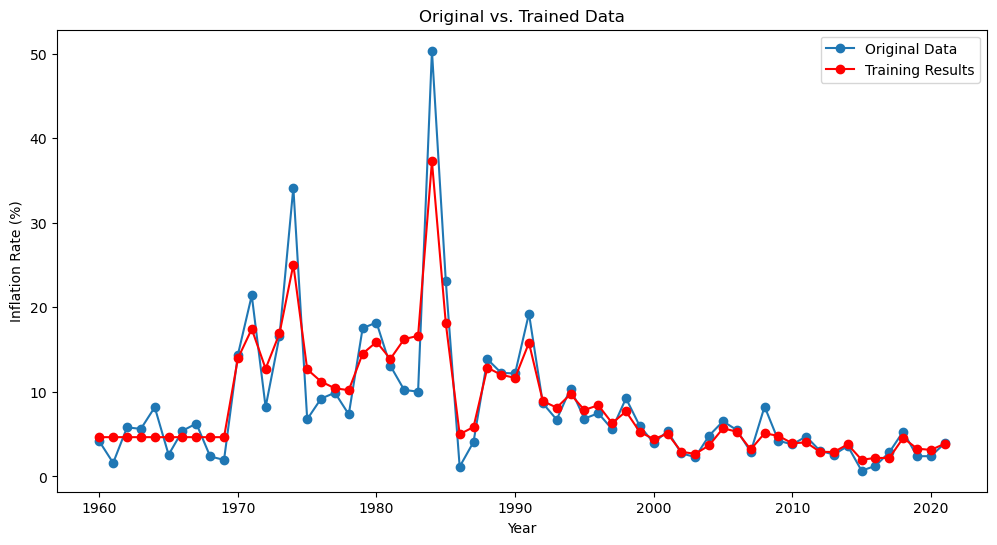

In [148]:
# Plot the original data
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.plot(df_inflation['Year'], df_inflation['Inflation Rate'], label='Original Data', marker='o')

# Plot the predicted data
plt.plot(df_inflation['Year'], forest_model.predict(X), label='Training Results', marker='o', color='red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Original vs. Trained Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [151]:
# Find Average increase of Total Debt Per Year
avg_increase = df_inflation['Total Debt'].diff().mean()
print(f'Average increase of Total Debt Per Year: {avg_increase:.2f}')

Average increase of Total Debt Per Year: 1.74


## Inflation Rate Predictions with RandomForest

In [185]:
# Create future years
future_years = np.arange(2021, 2028)

# Create a dataframe with the future years
df_future = pd.DataFrame({'Year': future_years})

# Set initial values
initial_total_debt = df_inflation['Total Debt'].tolist()[-1]
df_future['Total Debt'] = initial_total_debt
df_future['Added Debt'] = avg_increase

# Simulate Total Debt increase for each year
for year in range(1, len(future_years)):
    # Calculate Total Debt for the current year based on the average increase
    total_debt = df_future['Total Debt'].iloc[year - 1] + avg_increase
    
    # Update 'Total Debt' column
    df_future.at[year, 'Total Debt'] = total_debt

# Make predictions for the future years
df_future['Inflation Rate'] = forest_model.predict(X_test)

# Show the dataframe
print(df_future)

   Year  Total Debt  Added Debt  Inflation Rate
0  2021  106.428000    1.744721        3.919281
1  2022  108.172721    1.744721        2.188774
2  2023  109.917443    1.744721        4.643149
3  2024  111.662164    1.744721        2.183066
4  2025  113.406885    1.744721        4.643149
5  2026  115.151607    1.744721        5.104313
6  2027  116.896328    1.744721       11.218957


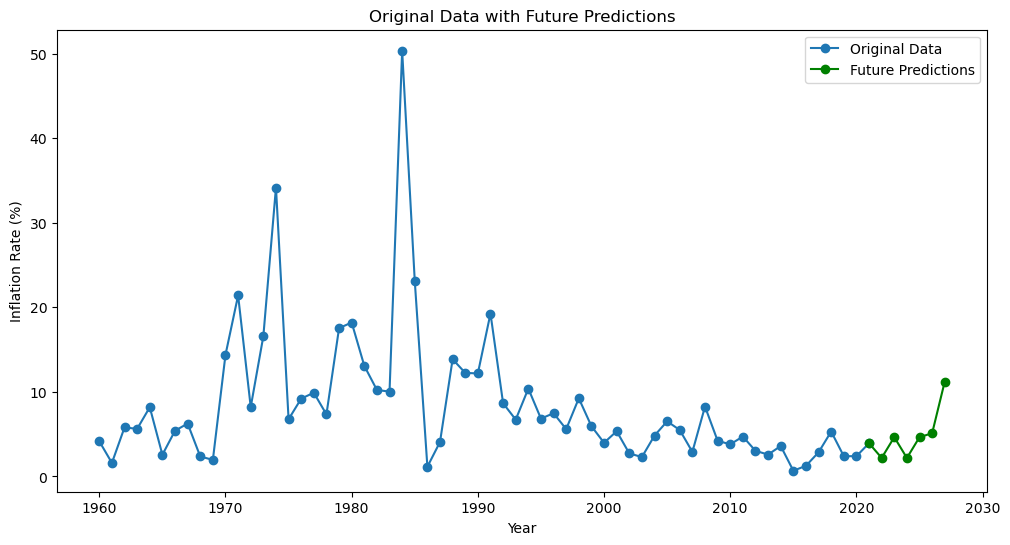

In [213]:
# Plot the original data
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.plot(df_inflation['Year'], df_inflation['Inflation Rate'], label='Original Data', marker='o')

# Plot the future predictions
plt.plot(df_future['Year'], df_future['Inflation Rate'], label='Future Predictions', marker='o', color='green')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Original Data with Future Predictions')

# Add a legend
plt.legend()

# Show the plot
plt.show()

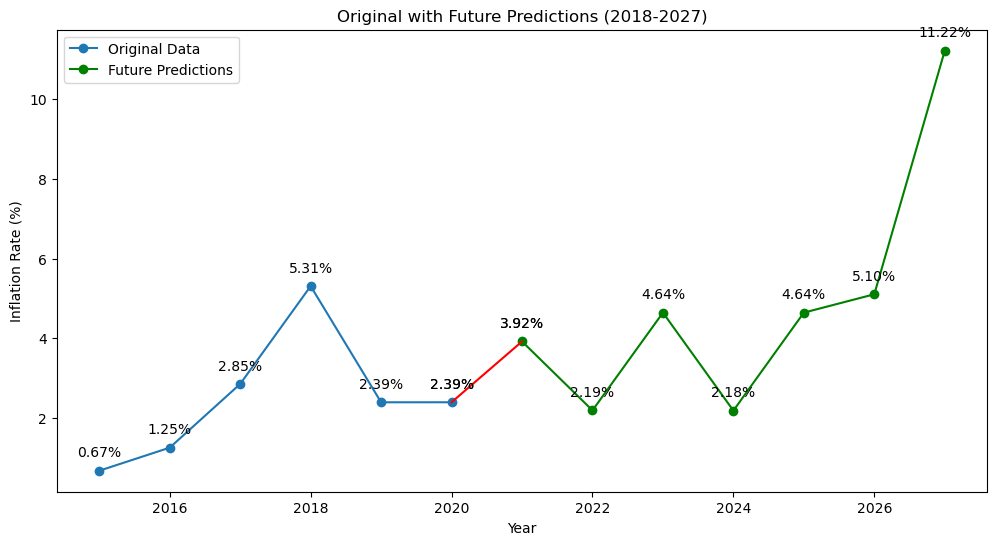

In [214]:
# Filter the original data for years 2018-2020
original_data_subset = df_inflation[(df_inflation['Year'] >= 2015) & (df_inflation['Year'] <= 2020)]

# Plot the original data
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.plot(original_data_subset['Year'], original_data_subset['Inflation Rate'], label='Original Data', marker='o')

# Plot the future predictions
plt.plot(df_future['Year'], df_future['Inflation Rate'], label='Future Predictions', marker='o', color='green')

# Connect the last data point of the original dataset and the first point of the predicted dataset with a line
last_original_year = original_data_subset['Year'].iloc[-1]
first_predicted_year = df_future['Year'].iloc[0]
last_original_inflation = original_data_subset['Inflation Rate'].iloc[-1]
first_predicted_inflation = df_future['Inflation Rate'].iloc[0]
plt.plot([last_original_year, first_predicted_year], [last_original_inflation, first_predicted_inflation], color='red')

# Add data values for each plot
for x, y in zip(original_data_subset['Year'], original_data_subset['Inflation Rate']):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
for x, y in zip(df_future['Year'], df_future['Inflation Rate']):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'{last_original_inflation:.2f}%', (last_original_year, last_original_inflation), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'{first_predicted_inflation:.2f}%', (first_predicted_year, first_predicted_inflation), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Original with Future Predictions (2018-2027)')

# Add a legend
plt.legend()

# Show the plot
plt.show()